In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

# Generate Synthetic AQI Dataset
np.random.seed(42)  # Ensure reproducibility

# Generate sample data
n_samples = 500
data = {
    "Date": pd.date_range(start="2023-01-01", periods=n_samples, freq="D"),
    "Temperature": np.random.uniform(10, 40, n_samples),
    "Humidity": np.random.uniform(20, 80, n_samples),
    "PM2.5": np.random.uniform(10, 200, n_samples),
    "PM10": np.random.uniform(20, 300, n_samples),
    "CO": np.random.uniform(0.1, 3.0, n_samples),
    "NO2": np.random.uniform(10, 100, n_samples),
    "SO2": np.random.uniform(5, 50, n_samples)
}

# Calculate synthetic AQI based on pollutant levels
data["AQI"] = (
    0.4 * data["PM2.5"] + 
    0.3 * data["PM10"] + 
    0.2 * data["NO2"] + 
    0.1 * data["SO2"] + 
    np.random.normal(0, 10, n_samples)
)

# Create DataFrame
df = pd.DataFrame(data)

# Select features and target
X = df[["Temperature", "Humidity", "PM2.5", "PM10", "CO", "NO2", "SO2"]]
y = df["AQI"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Display sample predictions
sample_predictions = pd.DataFrame({
    "Actual AQI": y_test.values,
    "Predicted AQI": y_pred
}).head(10)

print("\nSample Predictions:")
print(sample_predictions)


Mean Squared Error (MSE): 120.16
R-squared (R²): 0.89

Sample Predictions:
   Actual AQI  Predicted AQI
0   86.356002      89.156612
1   93.130790      95.214770
2  120.074197     108.753236
3  165.516500     158.292759
4   86.725366      95.483146
5   79.148146      92.057242
6   96.180987      96.428938
7   81.850385      86.376778
8   90.408459     104.460276
9   91.341513      73.772403


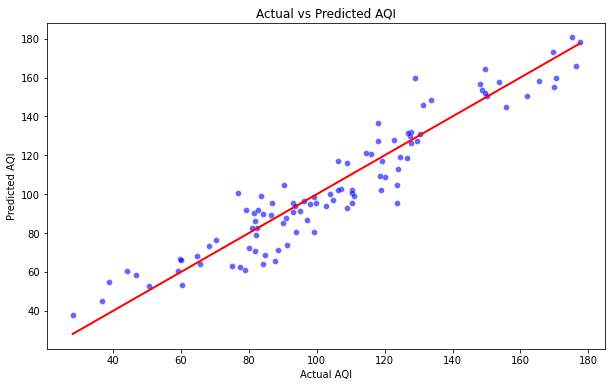

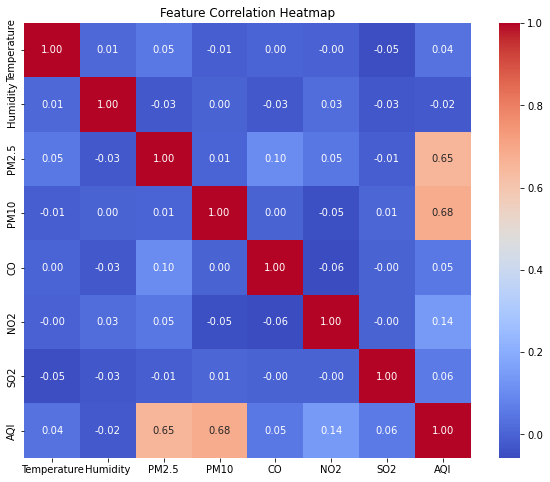

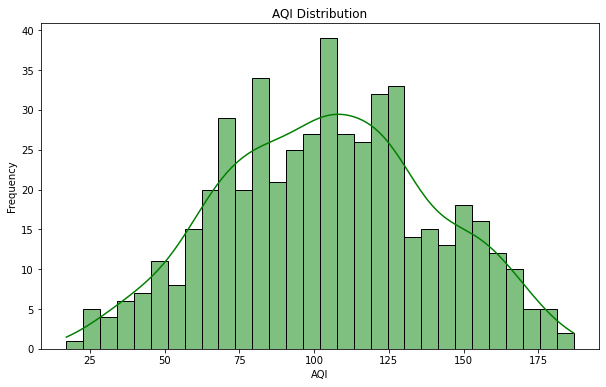

In [6]:
# Visualization: Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# AQI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["AQI"], bins=30, kde=True, color="green")
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()